## Quantitative comparisons and statistical visualizations

Visualizations can be used to compare data in a quantitative manner. This chapter explains several methods for quantitative visualizations.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

medals = pd.read_csv("medals.csv", index_col="country")
display(medals)

,Bronze,Gold,Silver
country,,,
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4


### Bar chart

Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

For example, in this exercise, you will visualize the number of gold medals won by each country in the provided `medals` DataFrame. The DataFrame contains the countries as the `index`, and a column called `"Gold"` that contains the number of gold medals won by each country, according to their rows.

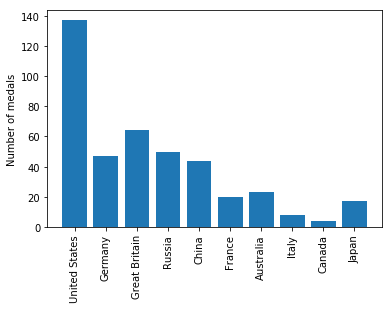

In [12]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals.Gold)

# Use the ax.set_xticklabels to set the x-axis tick labels to be the country names 
# Rotate the x-axis tick labels by 90 degrees by using the rotation key-word argument.
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

### Stacked bar chart

A stacked bar chart contains bars, where the height of each bar represents values. In addition, stacked on top of the first variable may be another variable. The additional height of this bar represents the value of this variable. And you can add more bars on top of that.

You will create a stacked bar chart that shows the number of gold, silver, and bronze medals won by each country, and you will add labels and create a legend that indicates which bars represent which medals.

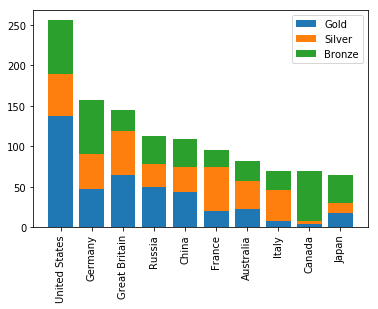

In [16]:
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals.Gold, label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals.Silver, bottom=medals.Gold, label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals.Bronze, bottom=medals.Gold+medals.Silver, label="Bronze")

# Use the ax.set_xticklabels to set the x-axis tick labels to be the country names 
# Rotate the x-axis tick labels by 90 degrees by using the rotation key-word argument.
ax.set_xticklabels(medals.index, rotation=90)

# Display the legend
ax.legend()

plt.show()

### Creating histograms

Histograms show the full distribution of a variable. In this exercise, we will display the distribution of weights of medalists in gymnastics and in rowing in the 2016 Olympic games for a comparison between them.

In [35]:
olympics = pd.read_csv("athlete_events.csv")
display(olympics.head(2))
mens_rowing = olympics.query('Sport == "Rowing" and Year == 2016 and Sex == "M"').dropna()
display(mens_rowing.head(2))
mens_gymnastics = olympics.query('Sport == "Gymnastics" and Year == 2016 and Sex == "M"').dropna()
display(mens_gymnastics.head(2))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver


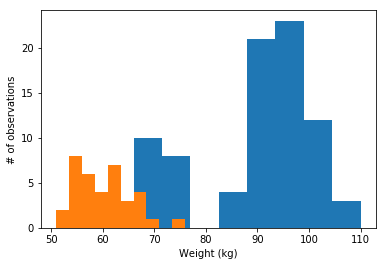

In [36]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing.Weight)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics.Weight)

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)" )

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

### "Step" histogram

Histograms allow us to see the distributions of the data in different groups in our data. In this exercise, you will select groups from the Summer 2016 Olympic Games medalist dataset to compare the height of medalist athletes in two different sports.

In the exercise below, you will visualize and label the histograms of two sports: "Gymnastics" and "Rowing" and see the marked difference between medalists in these two sports.

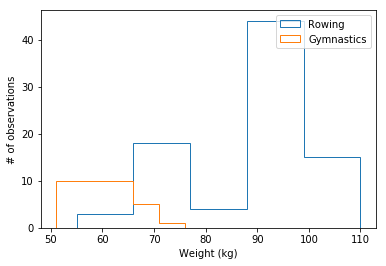

In [38]:
fig, ax = plt.subplots()

# For both histograms, use the 'histtype' argument to visualize the data using the 'step' type and set the number of bins to use to 5.

# Plot a histogram of "Weight" for mens_rowing and label this as "Rowing"
ax.hist(mens_rowing.Weight, histtype='step', label='Rowing', bins=5)

# Compare to histogram of "Weight" for mens_gymnastics and label this as "Gymnastics"
ax.hist(mens_gymnastics.Weight, histtype='step', label='Gymnastics', bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

### Adding error-bars to a bar chart

Statistical plotting techniques add quantitative information for comparisons into the visualization. For example, in this exercise, we will add error bars that quantify not only the difference in the means of the height of medalists in the 2016 Olympic Games, but also the standard deviation of each of these groups, as a way to assess whether the difference is substantial relative to the variability within each group.

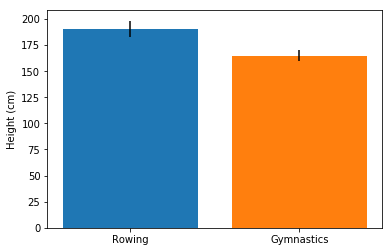

In [39]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing.Height.mean(), yerr=mens_rowing.Height.std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics.Height.mean(), yerr=mens_gymnastics.Height.std())


# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

### Creating boxplots

Boxplots provide additional information about the distribution of the data that they represent. They tell us what the median of the distribution is, what the inter-quartile range is and also what the expected range of approximately 99% of the data should be. Outliers beyond this range are particularly highlighted.

In this exercise, you will use the data about medalist heights that you previously visualized as histograms, and as bar charts with error bars, and you will visualize it as boxplots.

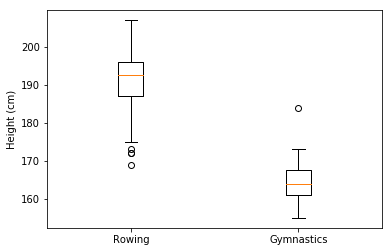

In [40]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

### Simple scatter plot

Scatter are a bi-variate visualization technique. They plot each record in the data as a point. The location of each point is determined by the value of two variables: the first variable determines the distance along the x-axis and the second variable determines the height along the y-axis.

In [41]:
# Read the data from file using read_csv
climate_change = pd.read_csv('climate_change.csv', parse_dates = True, index_col = 'date')


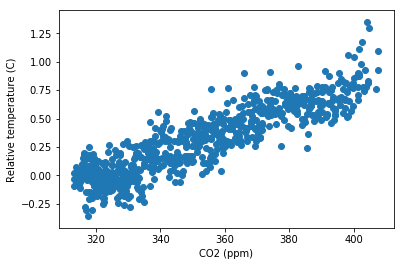

In [42]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change.co2, climate_change.relative_temp)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

### Encoding time by color

The screen only has two dimensions, but we can encode another dimension in the scatter plot using color. Here, we will visualize the `climate_change` dataset, plotting a scatter plot of the `"co2"` column, on the x-axis, against the `"relative_temp"` column, on the y-axis. We will encode time using the color dimension, with earlier times appearing as darker shades of blue and later times appearing as brighter shades of yellow.

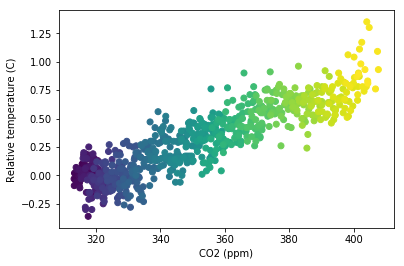

In [43]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change.co2, climate_change.relative_temp, c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()